In [0]:
#información extraida de https://datos.gob.ar/dataset/salud-defunciones-ocurridas-registradas-republica-argentina
#https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import warnings #nos sirve para ignorar los warnings que puedan aparecer. Se utiliza aca solo con fines esteticos
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Cargamos el dataset ya procesado**


In [47]:
defunciones = pd.read_excel('/content/drive/My Drive/CIENCIA DE DATOS-Colab Notebooks/DATASETS DEFUNCIONES/defunciones_procesado.xlsx')
defunciones.head(10)


,año,jurisdiccion_de_residencia_id,jurisdiccion_de_residencia_nombre,sexo_id,sexo_nombre,cie10_causa_id,cie10_causa_nombre,grupos_edad_id,grupos_edad_nombre,cantidad_de_defunciones,poblacion,cantidad_de_defunciones_percapita,letra_causa,numero_causa,causa_muerte
0,2010,2,Ciudad Aut. de Buenos Aires,2,Mujer,J98,Otros trastornos respiratorios,7,30 a 34,2,1622915,1.232350e-06,J,98,Enfermedades del sistema respiratorio
1,2010,14,Córdoba,2,Mujer,G60,Neuropatía hereditaria e idiopática,4,15 a 19,1,1730725,5.777925e-07,G,60,Enfermedades del sistema nervioso
2,2010,6,Buenos Aires,1,Varón,I38,"Endocarditis, válvula no especificada",17,80 y más,1,10496134,9.527317e-08,I,38,Enfermedades del sistema circulatorio
3,2010,30,Entre Ríos,2,Mujer,G12,Atrofia muscular espinal y síndromes afines,14,65 a 69,1,640467,1.561361e-06,G,12,Enfermedades del sistema nervioso
4,2010,14,Córdoba,1,Varón,Y20,"Ahorcamiento, estrangulamiento y sofocación, d...",16,75 a 79,1,1642300,6.089021e-07,Y,20,Eventos de intención no determinada
5,2010,30,Entre Ríos,1,Varón,J20,Bronquitis aguda,2,1 a 9,1,615107,1.625733e-06,J,20,Enfermedades del sistema respiratorio
6,2010,6,Buenos Aires,2,Mujer,G61,Polineuopatía inflamatoria,10,45 a 49,1,10966864,9.118377e-08,G,61,Enfermedades del sistema nervioso
7,2010,74,San Luis,1,Varón,X74,Lesión autoinfligida intencionalmente por disp...,12,55 a 59,2,219940,9.093389e-06,X,74,Lesiones autoinflingidas intencionalmente
8,2010,90,Tucumán,1,Varón,C25,Tumor maligno del páncreas,17,80 y más,3,733744,4.088619e-06,C,25,Tumores (neoplasias) malignos
9,2010,38,Jujuy,1,Varón,X31,Exposición al frío natural excesivo,15,70 a 74,1,336954,2.967764e-06,X,31,Exposición a fuerzas de la naturaleza


# **Cantidad de muertes por cada causa de muerte general (20 principales) en todos los años**

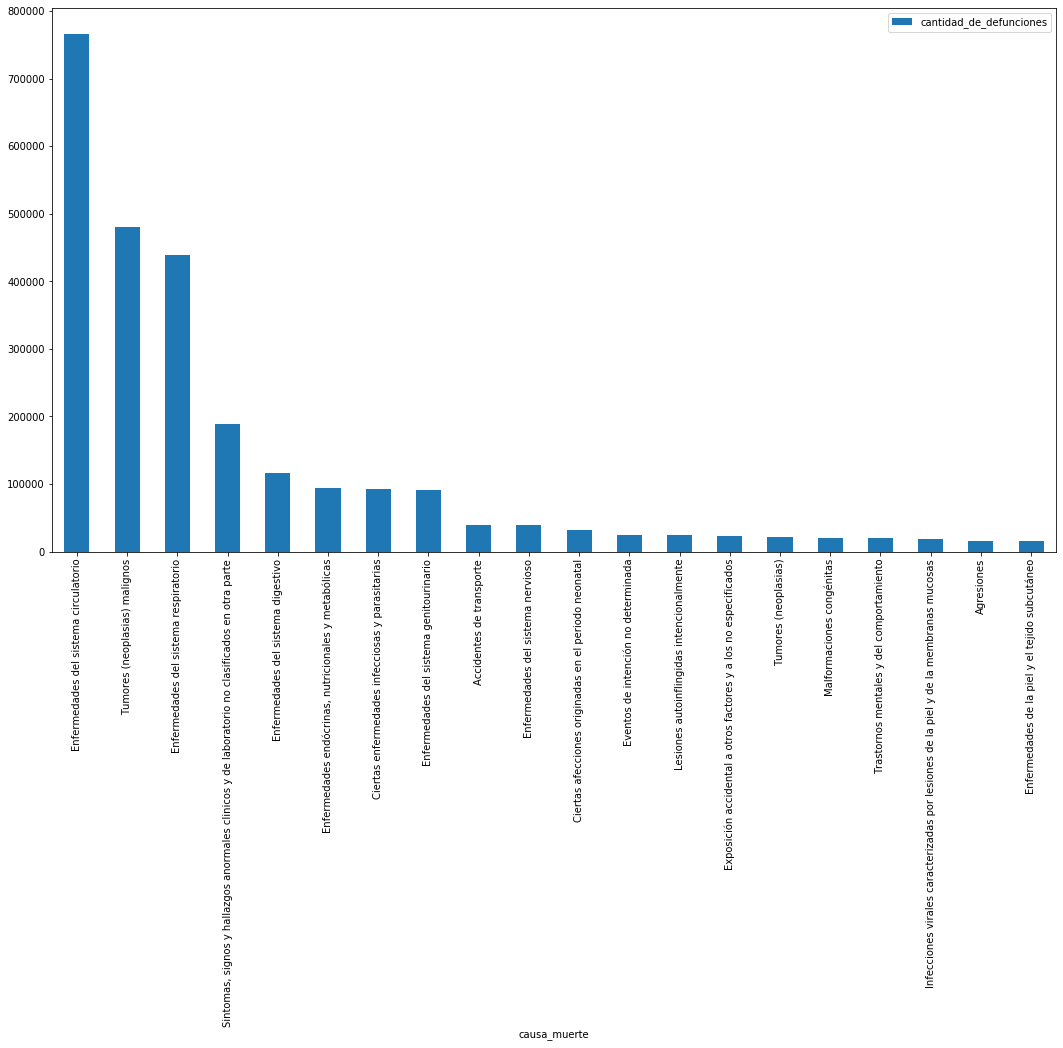

In [0]:
defunc_g = defunciones.groupby(["causa_muerte"])["cantidad_de_defunciones"].sum().sort_values(ascending=False).iloc[0:20]
defunc_g.head()
df_defunc_g = pd.DataFrame(defunc_g) 
df_defunc_g['causa'] = df_defunc_g.index
df_defunc_g.head()
df_defunc_g.plot.bar(figsize=(18,10))

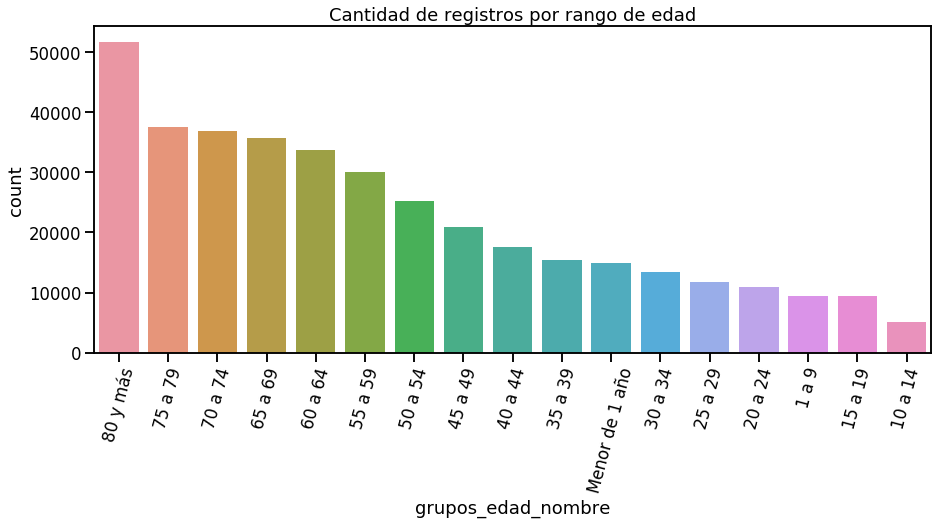

In [0]:
sns.set_context("talk")
plt.figure(figsize=(15,6))
sns.countplot(x="grupos_edad_nombre", data=defunciones, order = defunciones['grupos_edad_nombre'].value_counts().index)
plt.xticks(rotation=75)
plt.title("Cantidad de registros por rango de edad")
plt.show()

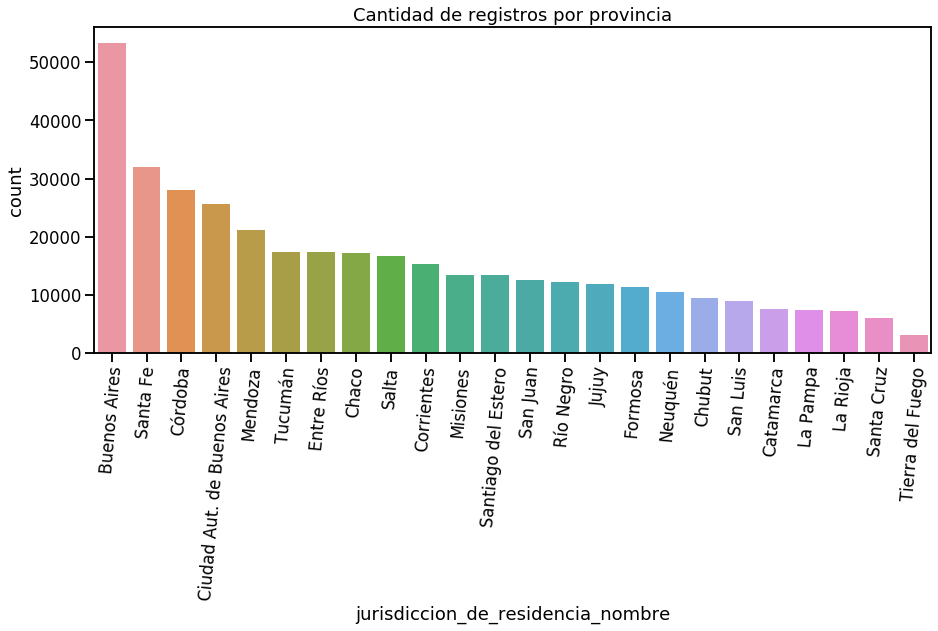

In [0]:
sns.set_context("talk")
plt.figure(figsize=(15,6))
az = sns.countplot(x="jurisdiccion_de_residencia_nombre", data=defunciones, order = defunciones['jurisdiccion_de_residencia_nombre'].value_counts().index)
plt.xticks(rotation=85)
plt.title("Cantidad de registros por provincia")
plt.show()

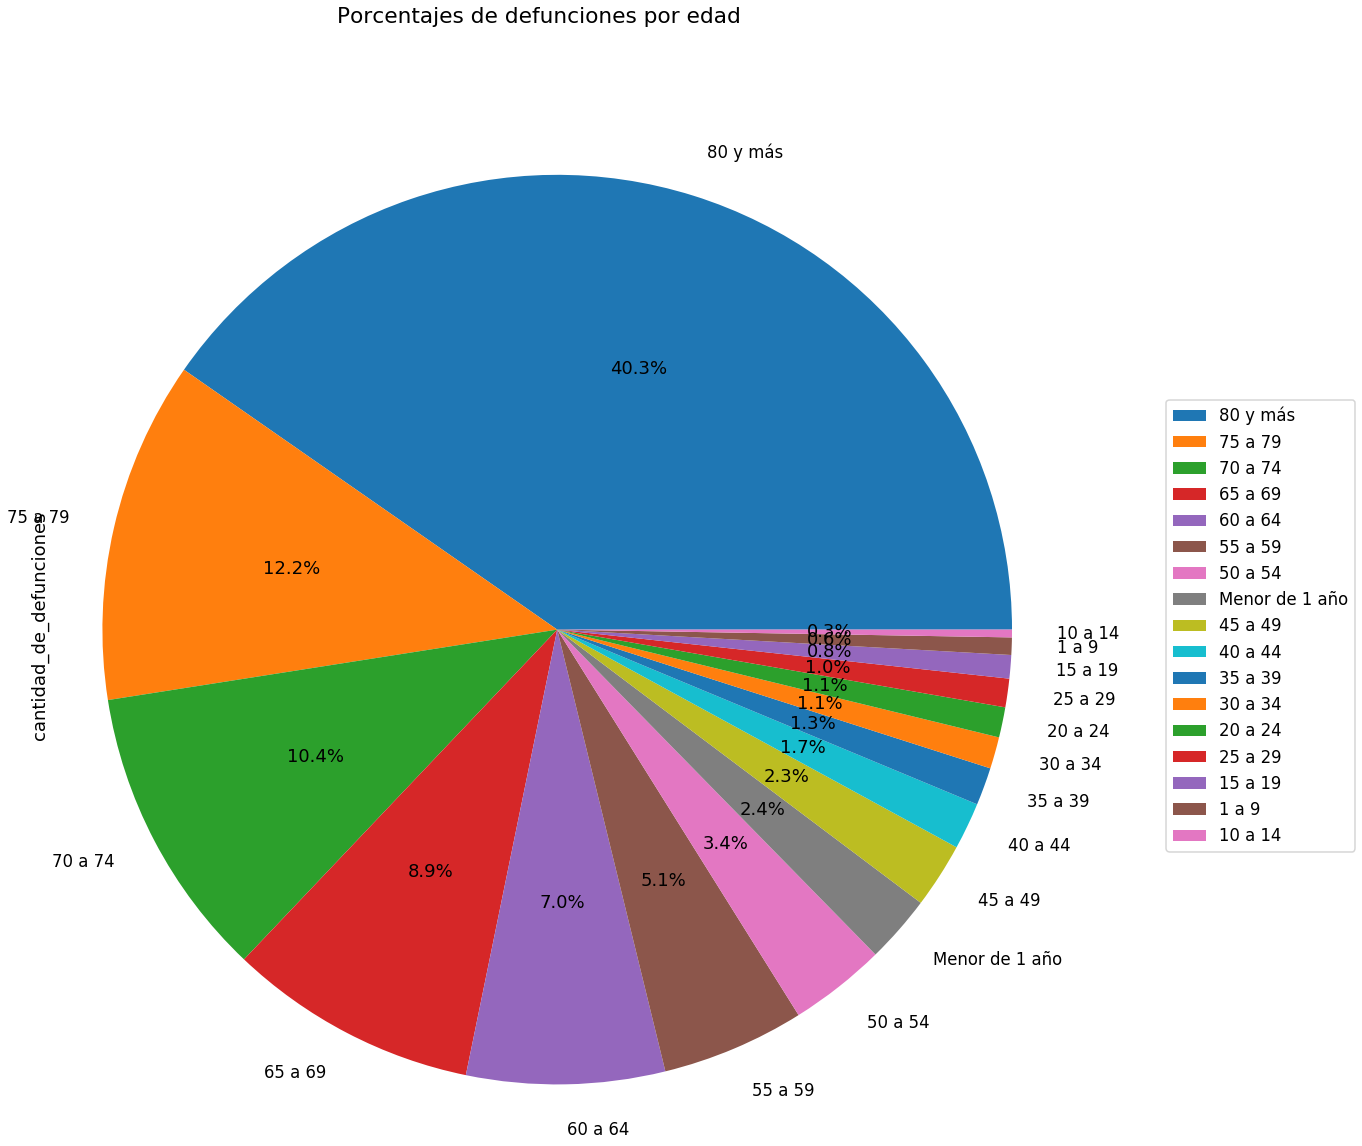

In [0]:
df_rango_edad = defunciones.groupby(['grupos_edad_nombre'])['cantidad_de_defunciones'].sum().sort_values(ascending=False)
df_rango_edad.to_frame()
df_rango_edad = pd.DataFrame(df_rango_edad)
df_rango_edad.reset_index()
df_rango_edad.plot.pie(figsize=(18,18), subplots=True, autopct='%1.1f%%', title = "Porcentajes de defunciones por edad")
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.axis('equal')
plt.show()

In [0]:
print("Variables mas importantes con respecto a nuestro objetivo")
corr = defunciones.corr()
corr.sort_values(["cantidad_de_defunciones"], ascending = False, inplace = True)
print(corr.cantidad_de_defunciones)

Variables mas importantes con respecto a nuestro objetivo
cantidad_de_defunciones              1.000000
cantidad_de_defunciones_percapita    0.494922
poblacion                            0.104522
grupos_edad_id                       0.075866
sexo_id                              0.008397
año                                  0.000124
numero_causa                        -0.003711
jurisdiccion_de_residencia_id       -0.060290
Name: cantidad_de_defunciones, dtype: float64


In [0]:
#descriptive statistics summary
defunciones['cantidad_de_defunciones'].describe()

count    379625.000000
mean          6.885827
std          52.982837
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        7372.000000
Name: cantidad_de_defunciones, dtype: float64

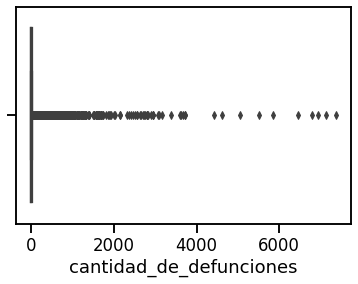

In [0]:
sns.boxplot(defunciones['cantidad_de_defunciones'])
plt.show()

# **Matriz de correlación**

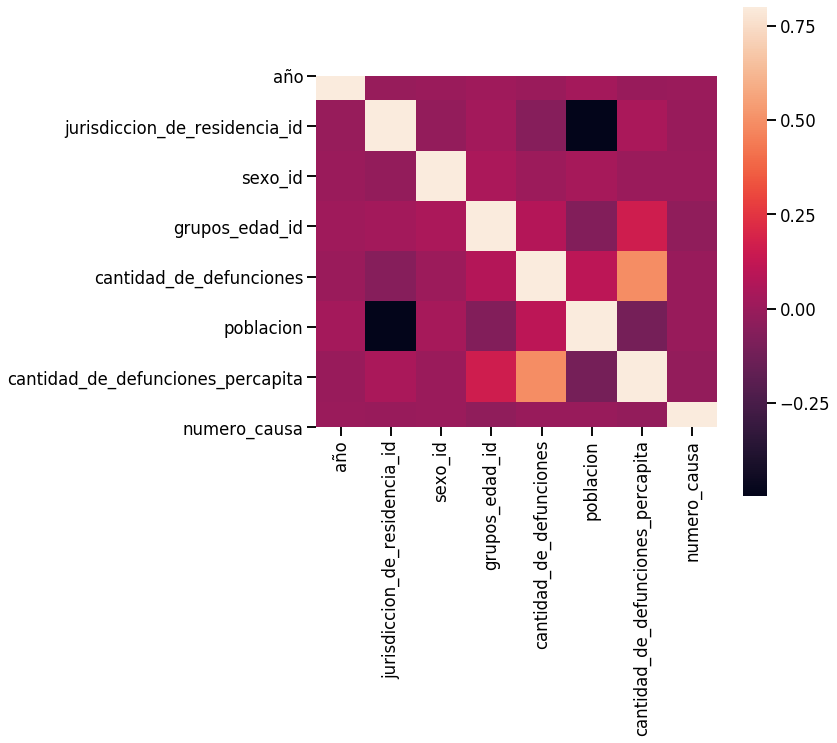

In [0]:
#correlation matrix
corrmat = defunciones.corr()
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

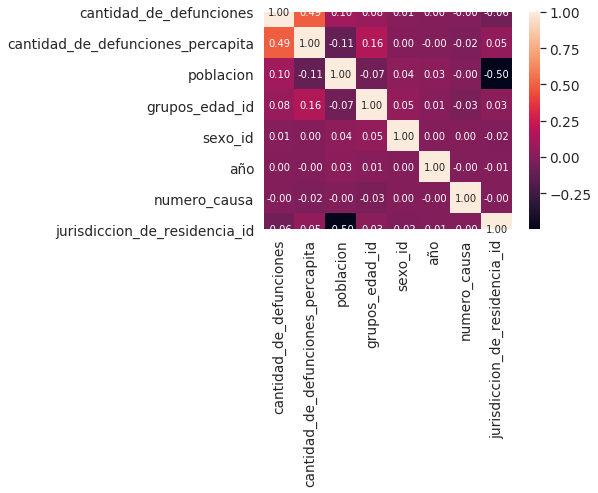

In [0]:
k = 8 #number of variables for heatmap
cols = corrmat.nlargest(k, 'cantidad_de_defunciones')['cantidad_de_defunciones'].index
cm = np.corrcoef(defunciones[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


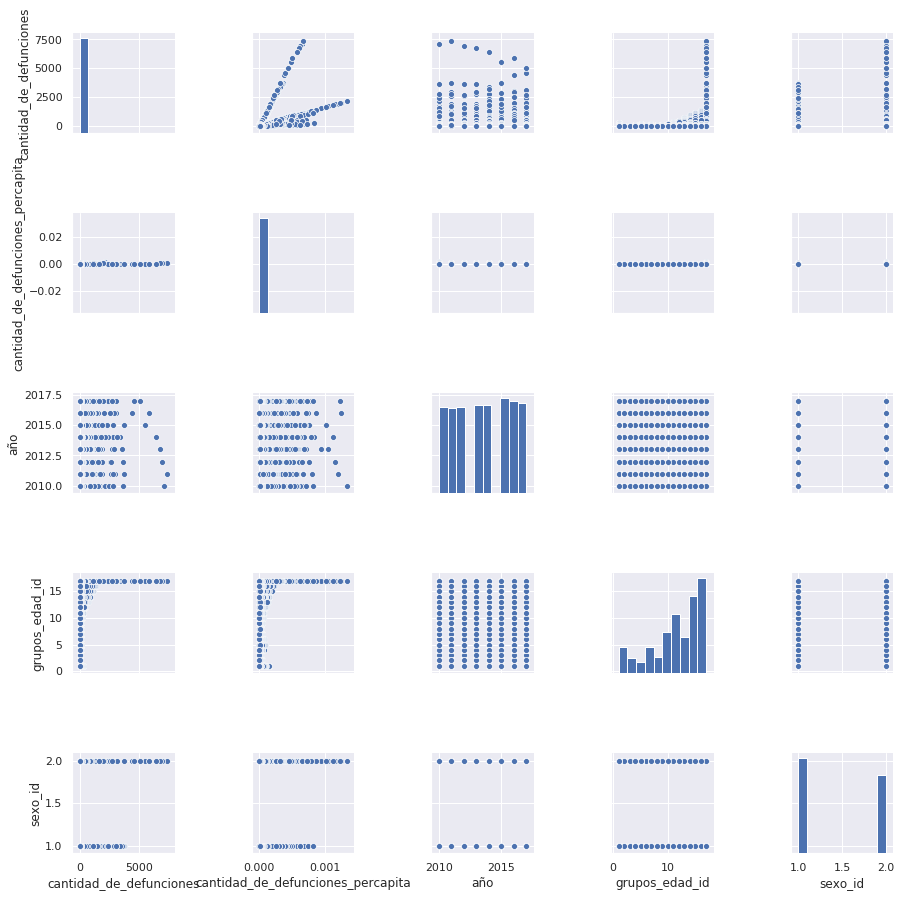

In [0]:
#scatterplot
sns.set()
cols = ['cantidad_de_defunciones', 'cantidad_de_defunciones_percapita', 'año', 'grupos_edad_id', 'sexo_id']
sns.pairplot(defunciones[cols], height = 2.5)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


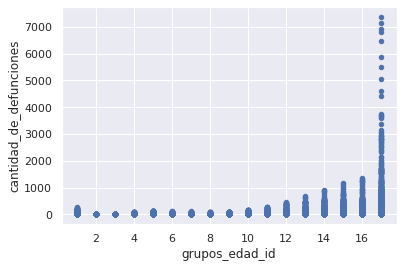

In [48]:
#scatter plot cantidad_de_defunciones/grupos_edad_id
data = pd.concat([defunciones['cantidad_de_defunciones'], defunciones['grupos_edad_id']], axis=1)
data.plot.scatter(x='grupos_edad_id', y='cantidad_de_defunciones');

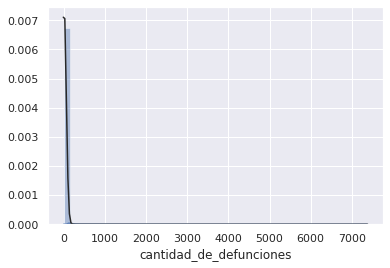

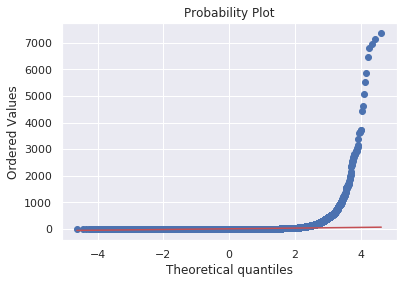

In [49]:
#histograma
sns.distplot(defunciones['cantidad_de_defunciones'], fit=norm);
fig = plt.figure()
res = stats.probplot(defunciones['cantidad_de_defunciones'], plot=plt)

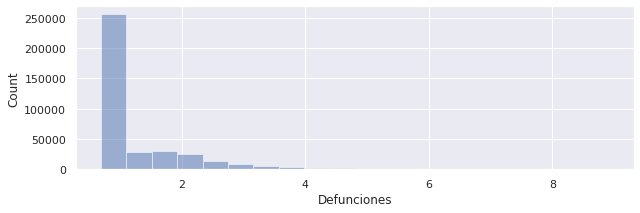

In [50]:
plt.figure(figsize=(10,3))
plt.hist(np.log(1+defunciones.cantidad_de_defunciones), bins=20,color='b' ,alpha=0.5)
plt.xlabel("Defunciones")
plt.ylabel("Count")
plt.show()

In [0]:
# Sumamos la cantidad de muertes por año
muertes_por_año = defunciones.groupby(["año"])["cantidad_de_defunciones"].sum()
muertes_por_año.head(10)

año
2010    315797
2011    316424
2012    317025
2013    323935
2014    323289
2015    330116
2016    349280
2017    338166
Name: cantidad_de_defunciones, dtype: int64

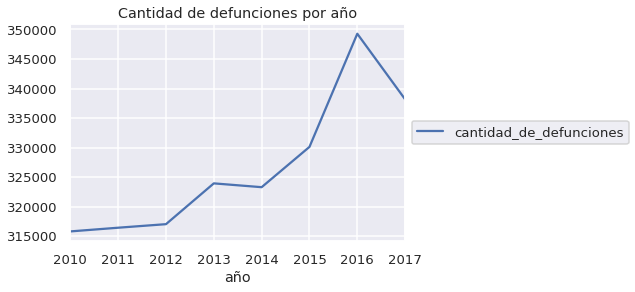

In [0]:
sns.set_context("talk", font_scale=0.8)
muertes_por_año.plot(title = "Cantidad de defunciones por año")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

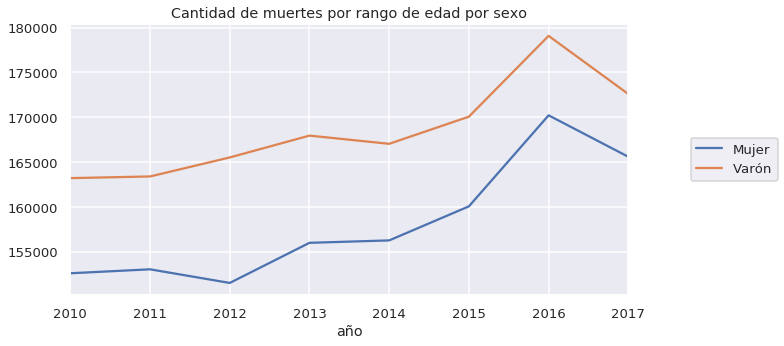

In [0]:
def_por_sexo = pd.pivot_table(defunciones,values = 'cantidad_de_defunciones',columns = 'sexo_nombre', index = 'año', aggfunc = np.sum)
sns.set_context("talk", font_scale=0.8)
def_por_sexo.plot(title = "Cantidad de muertes por rango de edad por sexo", figsize=(10,5))
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()

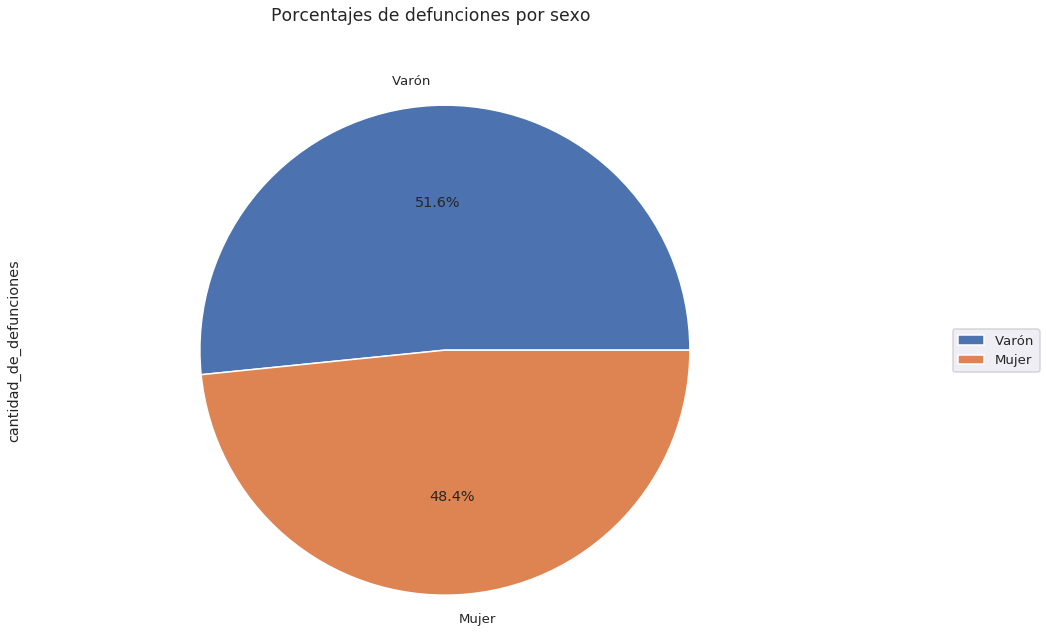

In [0]:
df_sexo2 = defunciones.groupby(['sexo_nombre'])['cantidad_de_defunciones'].sum().sort_values(ascending=False)
df_sexo2.to_frame()
df_sexo2 = pd.DataFrame(df_sexo2)
df_sexo2.reset_index()
df_sexo2.plot.pie(figsize=(15,10), subplots=True, autopct='%1.1f%%', title = "Porcentajes de defunciones por sexo")
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.axis('equal')
plt.show()

---


**Estas son las 10 principales causas especificas de defuncion**

In [0]:
muertes_por_ano = defunciones.groupby(["cie10_causa_nombre"])["cantidad_de_defunciones"].sum().sort_values(ascending=False).iloc[0:10]
#muertes_por_ano = defunciones.groupby(["cie10_causa_nombre","año"])["cantidad_de_defunciones"].sum().sort_values(ascending=False).iloc[0:129]
muertes_por_ano.to_frame()

,cantidad_de_defunciones
cie10_causa_nombre,
Insuficiencia cardíaca,228946
"Neumonía, organismo no especificado",188646
Infarto agudo del miocardio,129242
Otras causas mal definidas y las no especificadas de mortalidad,124769
"Insuficiencia respiratoria, no clasificada en otra parte",85405
Otras Sepsis,83057
Tumor maligno de los bronquios y del pulmón,74533
"Accidente vascular encefálico agudo, no especificado como hemorrágico o isquémico",71402
"Diabetes mellitus, no especificada",51740


In [0]:
# Creating a dataframe object from listoftuples
df_muertes_por_ano = pd.DataFrame(muertes_por_ano)
df_muertes_por_ano['causa'] = df_muertes_por_ano.index

In [0]:
def2 = pd.DataFrame(defunciones) 
def2 = def2.loc[(def2.cie10_causa_nombre == df_muertes_por_ano['causa'][0]) | (def2.cie10_causa_nombre == df_muertes_por_ano['causa'][1]) | (def2.cie10_causa_nombre == df_muertes_por_ano['causa'][2]) | (def2.cie10_causa_nombre == df_muertes_por_ano['causa'][3]) | (def2.cie10_causa_nombre == df_muertes_por_ano['causa'][4]) | (def2.cie10_causa_nombre == df_muertes_por_ano['causa'][5]) | (def2.cie10_causa_nombre == df_muertes_por_ano['causa'][6]) | (def2.cie10_causa_nombre == df_muertes_por_ano['causa'][7]) | (def2.cie10_causa_nombre == df_muertes_por_ano['causa'][8]) | (def2.cie10_causa_nombre == df_muertes_por_ano['causa'][9])]
def2.head()

,año,jurisdiccion_de_residencia_id,jurisdiccion_de_residencia_nombre,sexo_id,sexo_nombre,cie10_causa_id,cie10_causa_nombre,grupos_edad_id,grupos_edad_nombre,cantidad_de_defunciones,poblacion,cantidad_de_defunciones_percapita,letra_causa,numero_causa,causa_muerte
18,2010,30,Entre Ríos,2,Mujer,R99,Otras causas mal definidas y las no especifica...,11,50 a 54,5,640467,0.000008,R,99,"Sintomas, signos y hallazgos anormales clinico..."
29,2010,50,Mendoza,2,Mujer,E14,"Diabetes mellitus, no especificada",7,30 a 34,1,905309,0.000001,E,14,"Enfermedades endócrinas, nutricionales y metab..."
33,2010,38,Jujuy,1,Varón,A41,Otras Sepsis,4,15 a 19,2,336954,0.000006,A,41,Ciertas enfermedades infecciosas y parasitarias
35,2010,18,Corrientes,1,Varón,I64,"Accidente vascular encefálico agudo, no especi...",10,45 a 49,2,501452,0.000004,I,64,Enfermedades del sistema circulatorio
38,2010,66,Salta,2,Mujer,I21,Infarto agudo del miocardio,16,75 a 79,8,626008,0.000013,I,21,Enfermedades del sistema circulatorio


In [0]:
flujo_tabla = pd.pivot_table(data = def2, values = 'cantidad_de_defunciones', index = 'año', columns = 'cie10_causa_nombre', aggfunc= np.sum, )
flujo_tabla.head()

cie10_causa_nombre,"Accidente vascular encefálico agudo, no especificado como hemorrágico o isquémico","Diabetes mellitus, no especificada",Infarto agudo del miocardio,Insuficiencia cardíaca,"Insuficiencia respiratoria, no clasificada en otra parte","Neumonía, organismo no especificado",Otras Sepsis,Otras causas mal definidas y las no especificadas de mortalidad,Tumor maligno de los bronquios y del pulmón,Tumor maligno del colon
año,,,,,,,,,,
2010,9088,6204,14966,33256,11150,18475,10892,18095,8958,5881
2011,8348,6130,15197,33206,11533,18778,10691,18271,9209,5812
2012,8314,6059,15451,31705,10962,18786,10155,17205,9197,5938
2013,8346,6000,15493,30278,11835,21854,10690,17819,9239,6085
2014,9059,6228,15341,27090,11465,23084,10881,15411,9302,6287


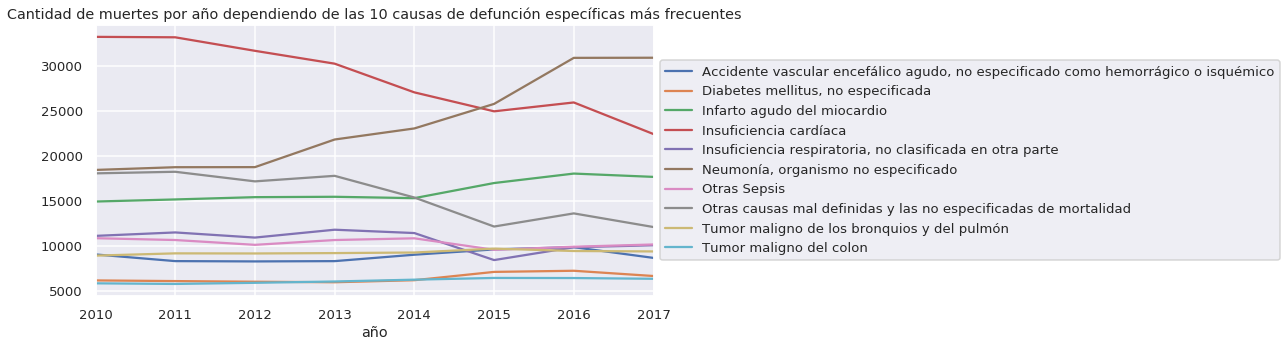

In [0]:
sns.set_context("talk", font_scale=0.8)
flujo_tabla.plot(title = "Cantidad de muertes por año dependiendo de las 10 causas de defunción específicas más frecuentes", figsize=(10,5))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

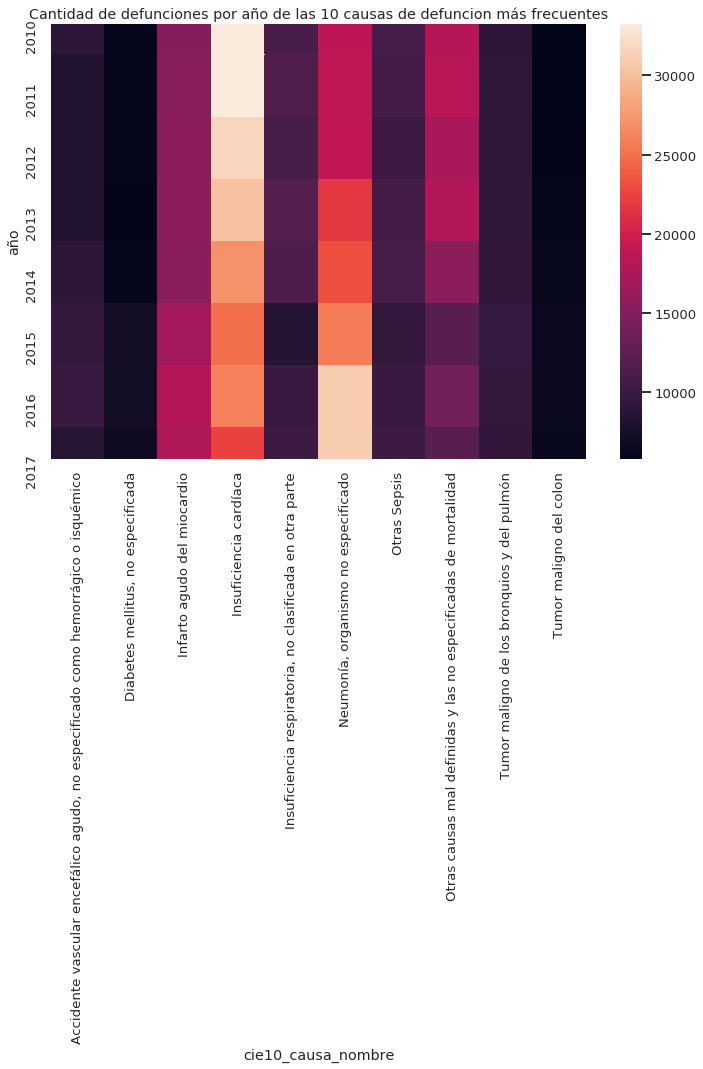

In [0]:
plt.figure(figsize=(12,8))
sns.heatmap(flujo_tabla)
plt.title("Cantidad de defunciones por año de las 10 causas de defuncion más frecuentes")
plt.show()

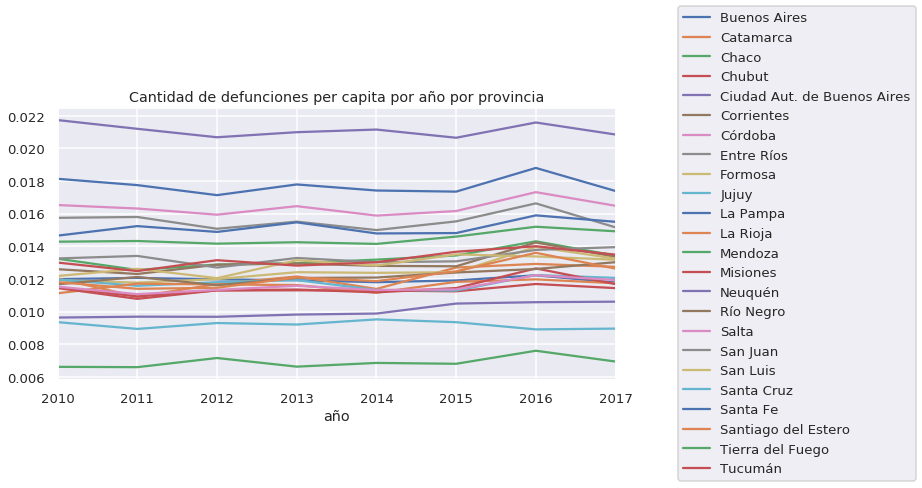

In [0]:
flujo_tabla2 = pd.pivot_table(data = defunciones, values = 'cantidad_de_defunciones_percapita', index = 'año', columns = 'jurisdiccion_de_residencia_nombre', aggfunc= np.sum, )
flujo_tabla2.head(7)

sns.set_context("talk", font_scale=0.8)
flujo_tabla2.plot(title = "Cantidad de defunciones per capita por año por provincia", figsize=(10,5))
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()

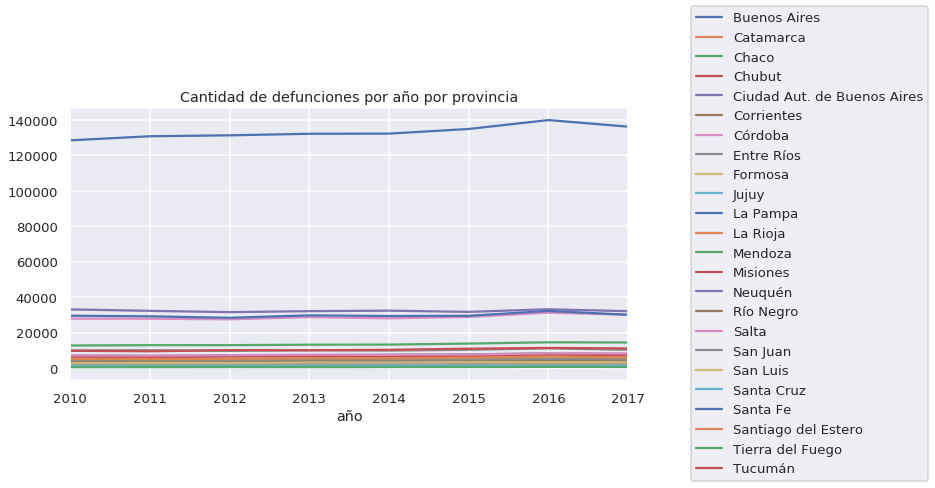

In [0]:
flujo_tabla2 = pd.pivot_table(data = defunciones, values = 'cantidad_de_defunciones', index = 'año', columns = 'jurisdiccion_de_residencia_nombre', aggfunc= np.sum)
sns.set_context("talk", font_scale=0.8)
flujo_tabla2.plot(title = "Cantidad de defunciones por año por provincia", figsize=(10,5))
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()

In [0]:
df_provincias = defunciones.groupby(['jurisdiccion_de_residencia_nombre'])['cantidad_de_defunciones'].sum().sort_values(ascending=False)
df_provincias.to_frame()
df_provincias = pd.DataFrame(df_provincias)
df_provincias.reset_index()

,jurisdiccion_de_residencia_nombre,cantidad_de_defunciones
0,Buenos Aires,1066324
1,Ciudad Aut. de Buenos Aires,257998
2,Santa Fe,237589
3,Córdoba,229840
4,Mendoza,107308
5,Tucumán,82475
6,Entre Ríos,80886
7,Salta,60220
8,Chaco,59524
9,Corrientes,54729


**Cantidad de defunciones por provincia**



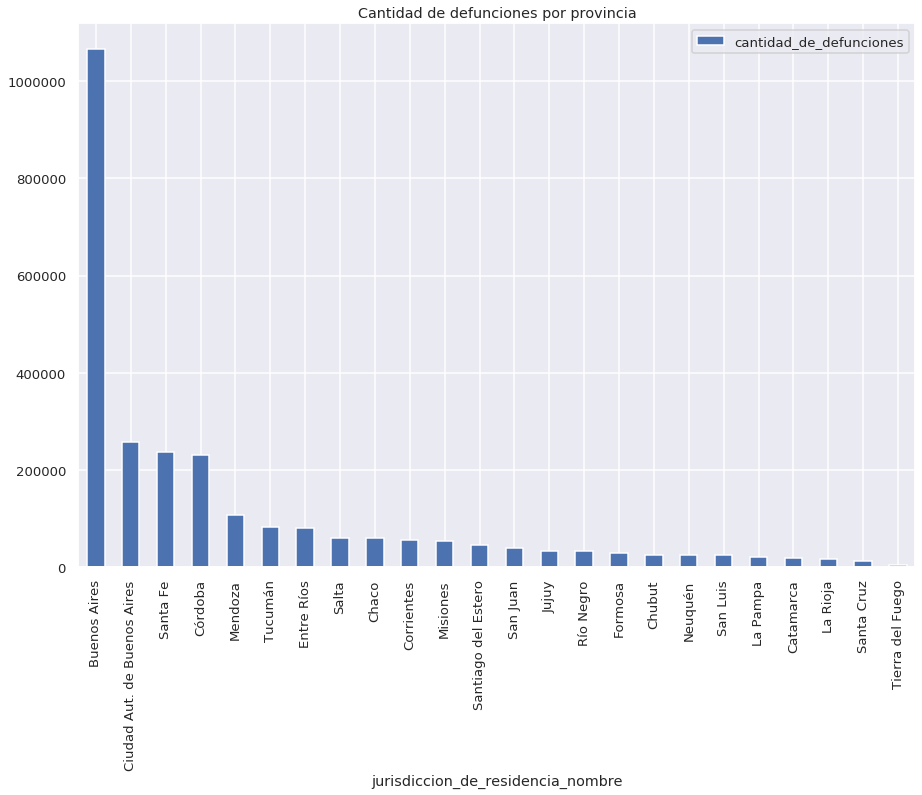

In [0]:
df_provincias.plot.bar(figsize=(15,10), title = "Cantidad de defunciones por provincia")

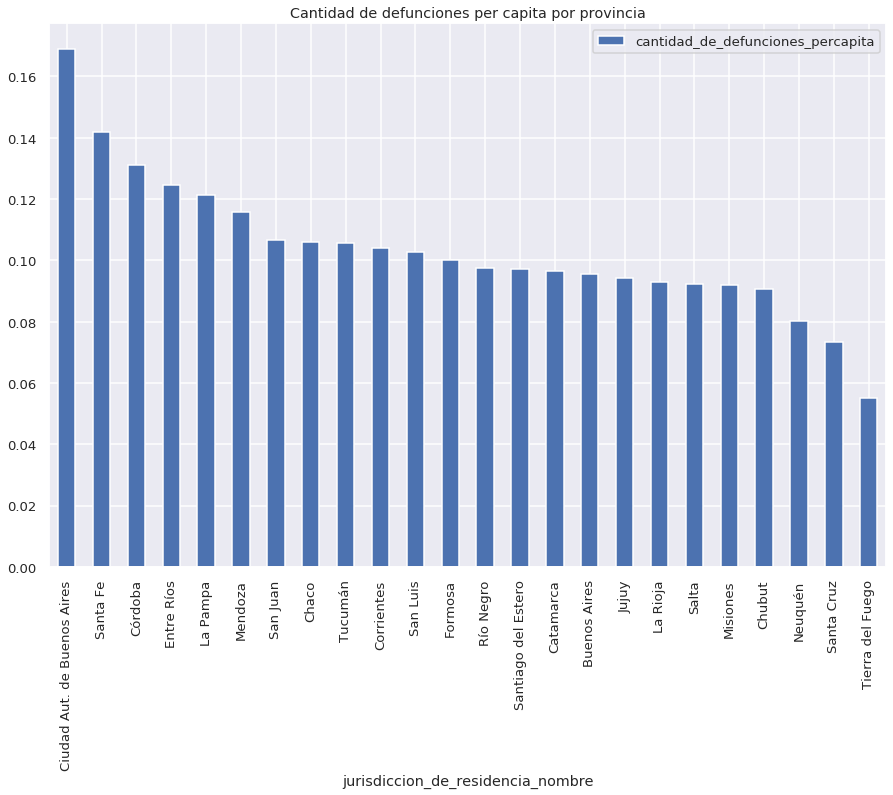

In [0]:
df_provincias_pc = defunciones.groupby(['jurisdiccion_de_residencia_nombre'])['cantidad_de_defunciones_percapita'].sum().sort_values(ascending=False)
df_provincias_pc.to_frame()
df_provincias_pc = pd.DataFrame(df_provincias_pc)
df_provincias_pc.reset_index()
df_provincias_pc.plot.bar(figsize=(15,10), title = "Cantidad de defunciones per capita por provincia")

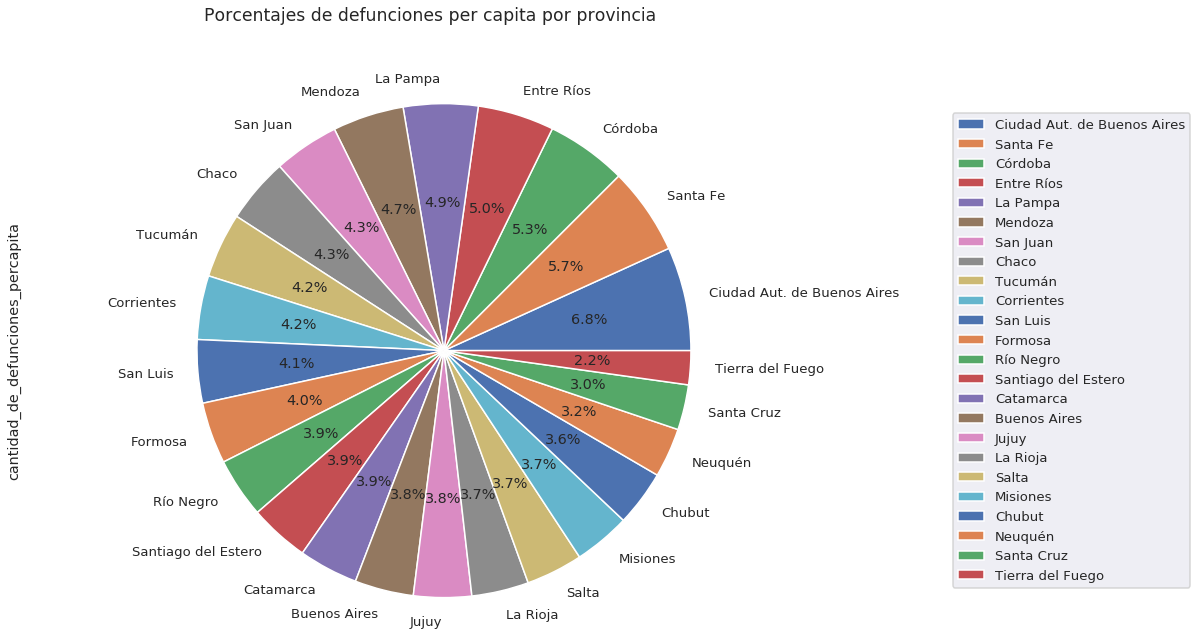

In [0]:
df_provincias2 = defunciones.groupby(['jurisdiccion_de_residencia_nombre'])['cantidad_de_defunciones_percapita'].sum().sort_values(ascending=False)
df_provincias2.to_frame()
df_provincias2 = pd.DataFrame(df_provincias2)
df_provincias2.reset_index()
df_provincias2.plot.pie(figsize=(15,10), subplots=True, autopct='%1.1f%%', title = "Porcentajes de defunciones per capita por provincia")
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.axis('equal')
plt.show()

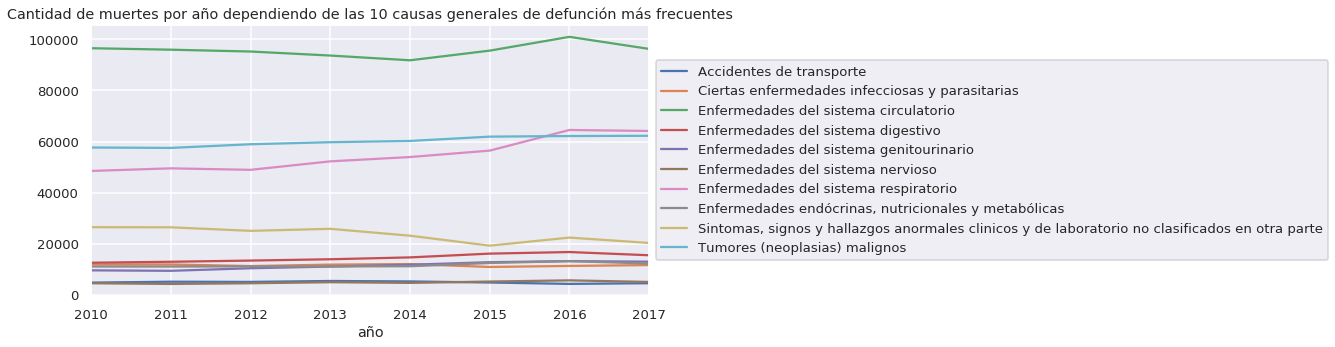

In [0]:
muertes_por_ano4 = defunciones.groupby(["causa_muerte"])["cantidad_de_defunciones"].sum().sort_values(ascending=False).iloc[0:10]
#muertes_por_ano4 = defunciones.groupby(["causa_muerte","año"])["cantidad_de_defunciones"].sum().sort_values(ascending=False).iloc[0:129]
muertes_por_ano4.to_frame()
df_muertes_por_ano4 = pd.DataFrame(muertes_por_ano4) 
df_muertes_por_ano4['causa'] = df_muertes_por_ano4.index
def22 = pd.DataFrame(defunciones) 
def22 = def22.loc[(def22.causa_muerte == df_muertes_por_ano4['causa'][0]) | (def22.causa_muerte == df_muertes_por_ano4['causa'][1]) | (def22.causa_muerte == df_muertes_por_ano4['causa'][2]) | (def22.causa_muerte == df_muertes_por_ano4['causa'][3]) | (def22.causa_muerte == df_muertes_por_ano4['causa'][4]) | (def22.causa_muerte == df_muertes_por_ano4['causa'][5]) | (def22.causa_muerte == df_muertes_por_ano4['causa'][6]) | (def22.causa_muerte == df_muertes_por_ano4['causa'][7]) | (def22.causa_muerte == df_muertes_por_ano4['causa'][8]) | (def22.causa_muerte == df_muertes_por_ano4['causa'][9])]
flujo_tabla4 = pd.pivot_table(data = def22, values = 'cantidad_de_defunciones', index = 'año', columns = 'causa_muerte', aggfunc= np.sum, )
sns.set_context("talk", font_scale=0.8)
flujo_tabla4.plot(title = "Cantidad de muertes por año dependiendo de las 10 causas generales de defunción más frecuentes", figsize=(10,5))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

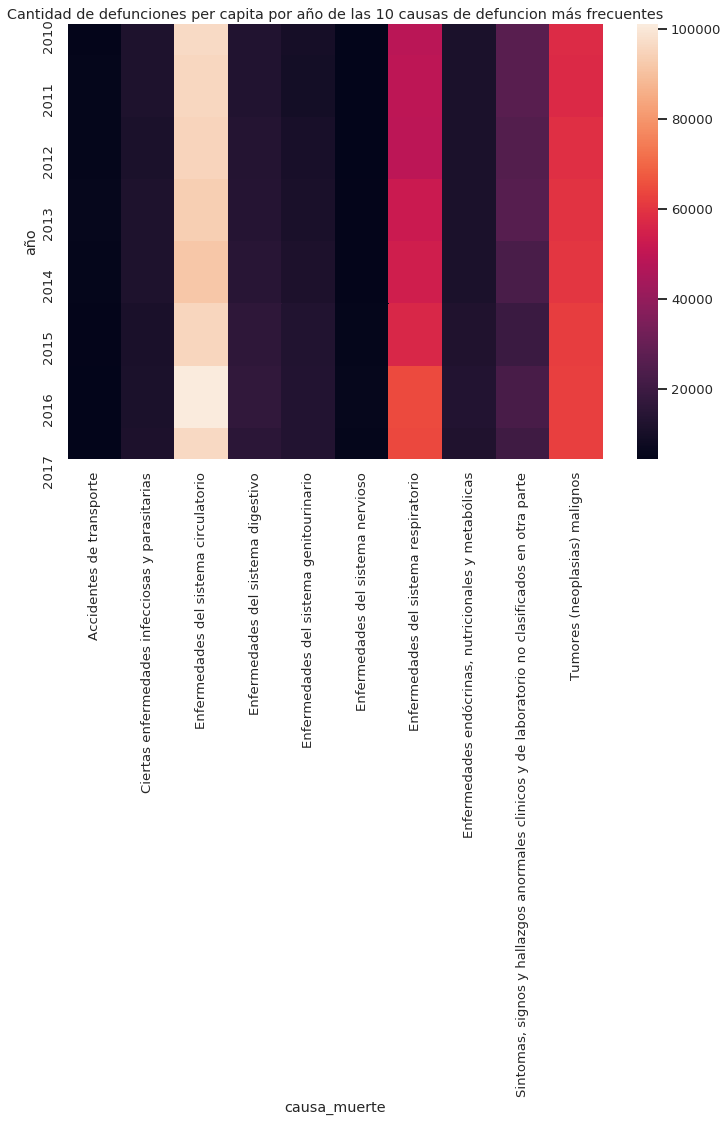

In [0]:
plt.figure(figsize=(12,8))
sns.heatmap(flujo_tabla4)
plt.title("Cantidad de defunciones per capita por año de las 10 causas de defuncion más frecuentes")
plt.show()



---


# **Cantidad de muertes por provincia de las 5 causas generales de defunción más frecuentes**

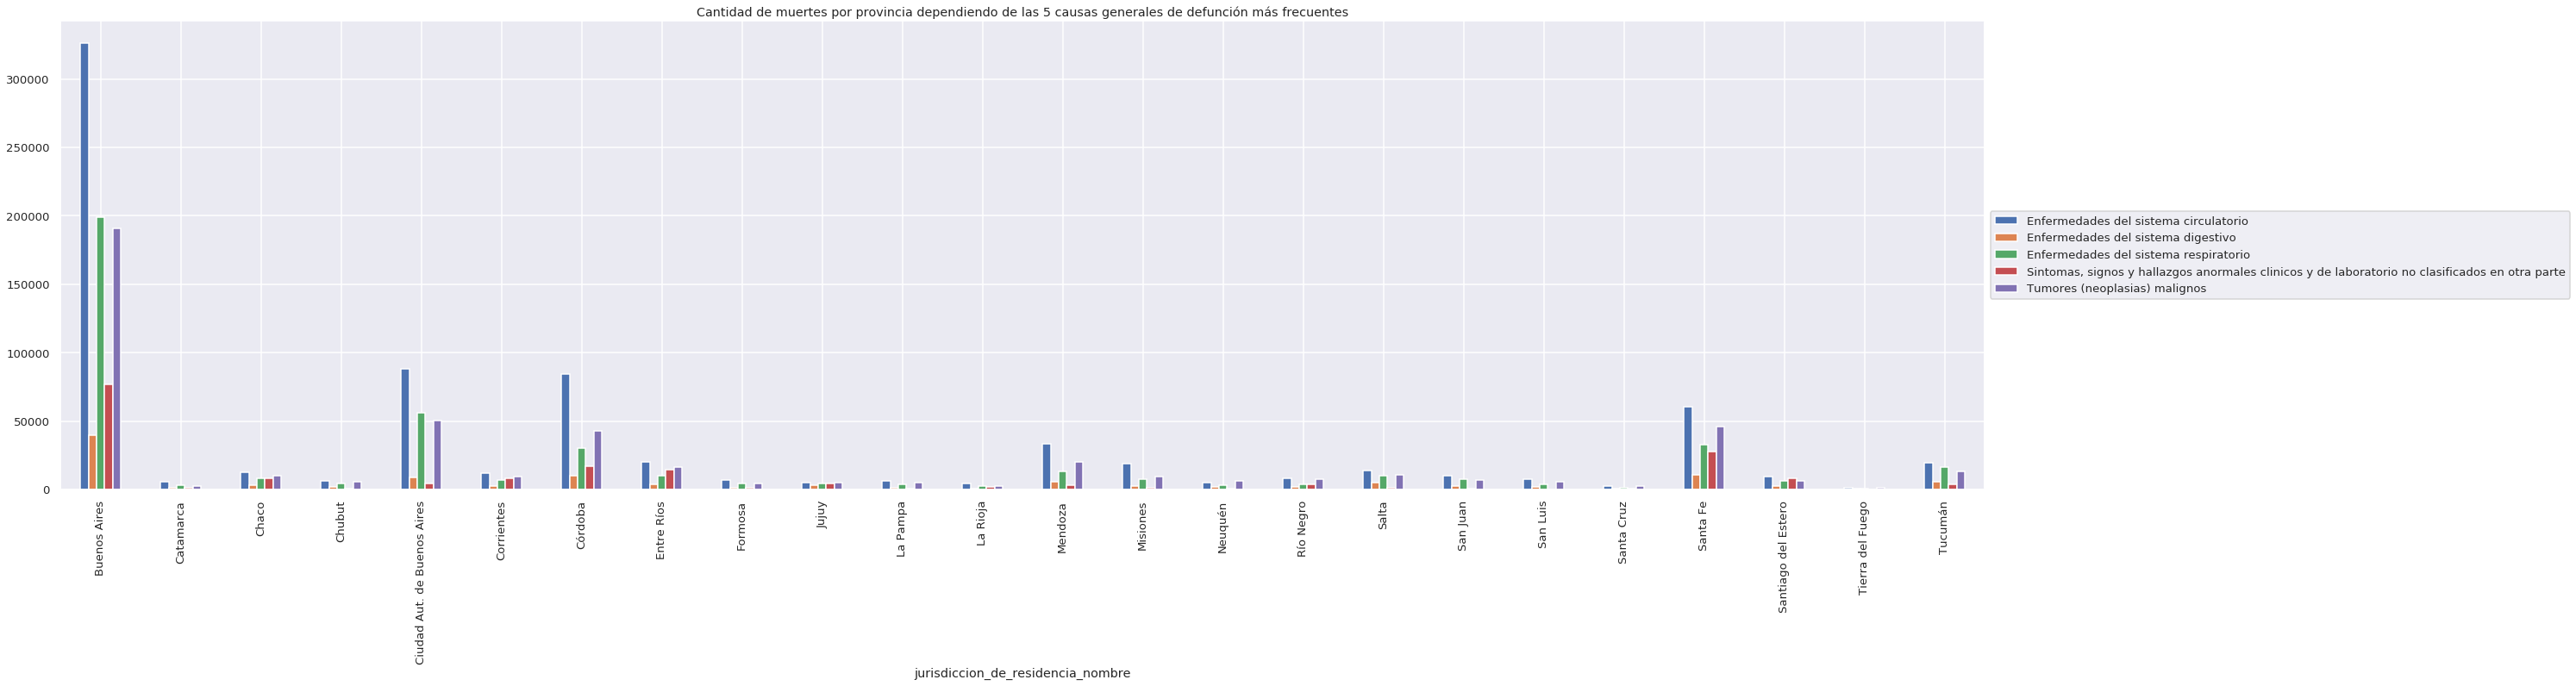

In [0]:
muertes_por_provincia = defunciones.groupby(["causa_muerte"])["cantidad_de_defunciones"].sum().sort_values(ascending=False).iloc[0:10]
muertes_por_provincia.to_frame()
df_muertes_por_provincia = pd.DataFrame(muertes_por_provincia) 
df_muertes_por_provincia['causa'] = df_muertes_por_provincia.index
def2 = pd.DataFrame(defunciones) 
def2 = def2.loc[(def2.causa_muerte == df_muertes_por_provincia['causa'][0]) | (def2.causa_muerte == df_muertes_por_provincia['causa'][1]) | (def2.causa_muerte == df_muertes_por_provincia['causa'][2]) | (def2.causa_muerte == df_muertes_por_provincia['causa'][3]) | (def2.causa_muerte == df_muertes_por_provincia['causa'][4])]
flujo_tabla = pd.pivot_table(data = def2, values = 'cantidad_de_defunciones', index = 'jurisdiccion_de_residencia_nombre', columns = 'causa_muerte', aggfunc= np.sum, )
flujo_tabla.plot.bar(figsize=(40,10), title="Cantidad de muertes por provincia dependiendo de las 5 causas generales de defunción más frecuentes")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))



---


# **Cantidad de muertes per capita por provincia de las 5 causas generales de defunción más frecuentes**

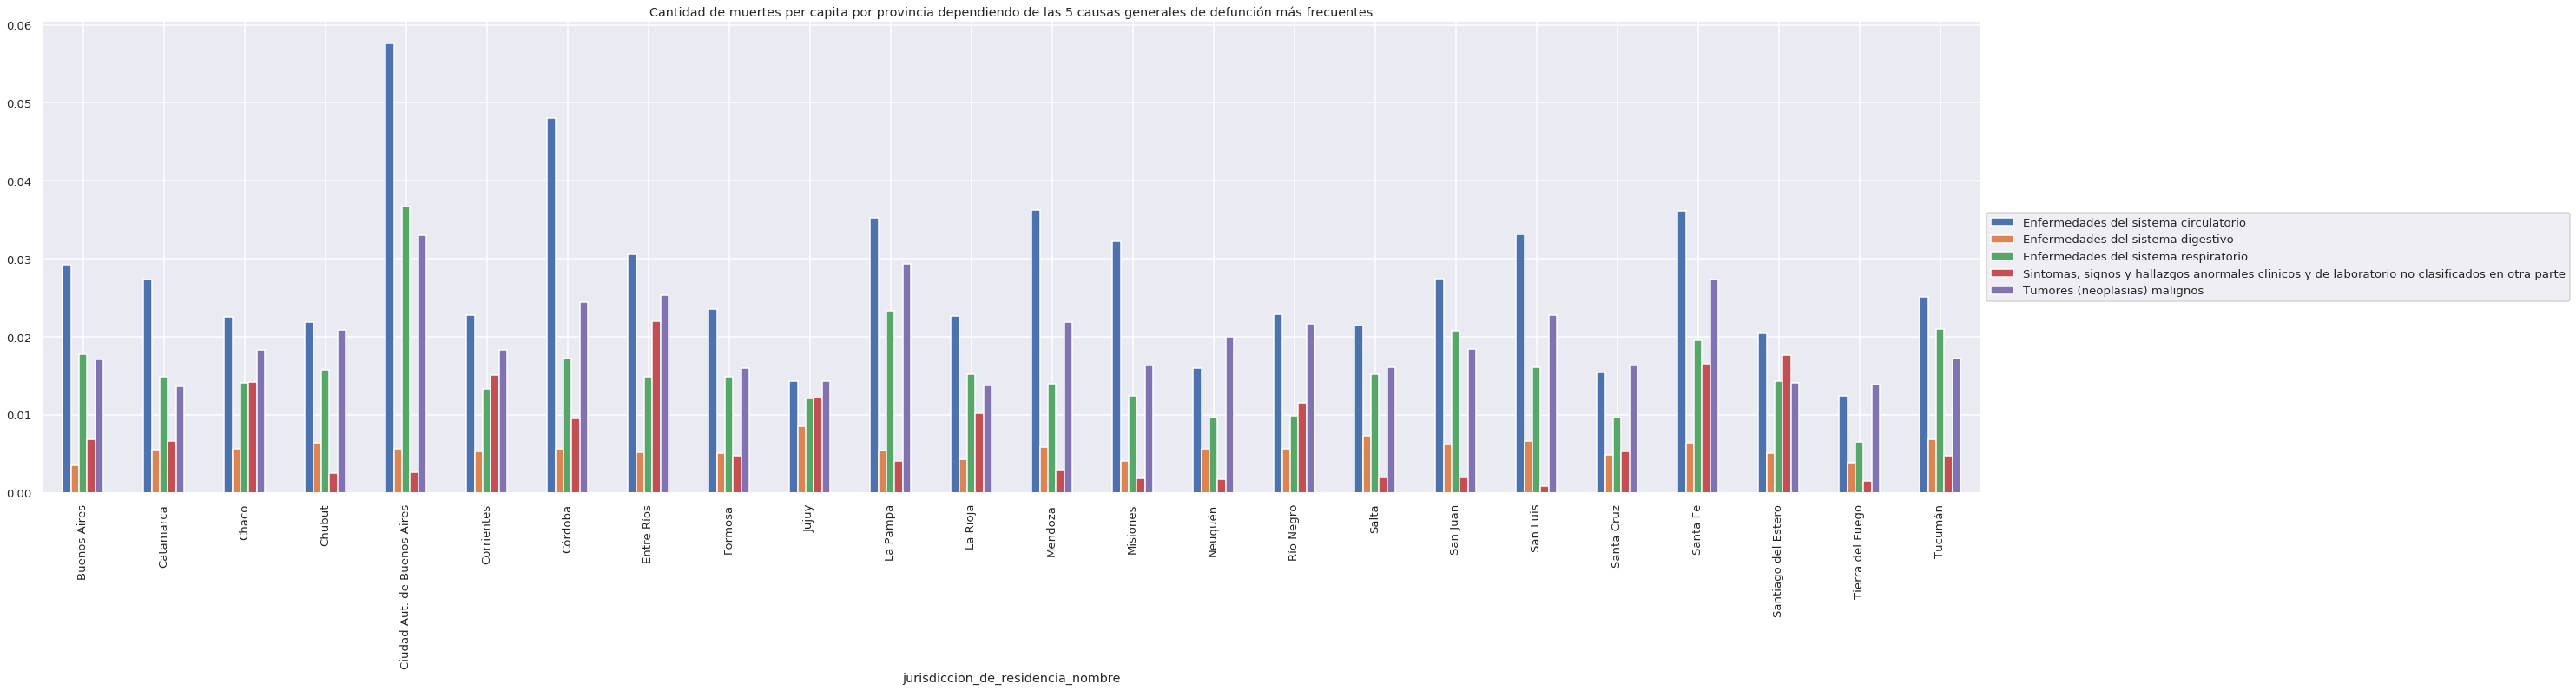

In [0]:
muertes_por_provincia_pc = defunciones.groupby(["causa_muerte"])["cantidad_de_defunciones_percapita"].sum().sort_values(ascending=False).iloc[0:10]
muertes_por_provincia_pc.to_frame()
df_muertes_por_provincia_pc = pd.DataFrame(muertes_por_provincia_pc) 
df_muertes_por_provincia_pc['causa'] = df_muertes_por_provincia_pc.index
def222 = pd.DataFrame(defunciones) 
def222 = def222.loc[(def222.causa_muerte == df_muertes_por_provincia_pc['causa'][0]) | (def222.causa_muerte == df_muertes_por_provincia_pc['causa'][1]) | (def222.causa_muerte == df_muertes_por_provincia_pc['causa'][2]) | (def222.causa_muerte == df_muertes_por_provincia_pc['causa'][3]) | (def222.causa_muerte == df_muertes_por_provincia_pc['causa'][4])]
flujo_tabla44 = pd.pivot_table(data = def222, values = 'cantidad_de_defunciones_percapita', index = 'jurisdiccion_de_residencia_nombre', columns = 'causa_muerte', aggfunc= np.sum, )
flujo_tabla44.plot.bar(figsize=(40,10), title="Cantidad de muertes per capita por provincia dependiendo de las 5 causas generales de defunción más frecuentes")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

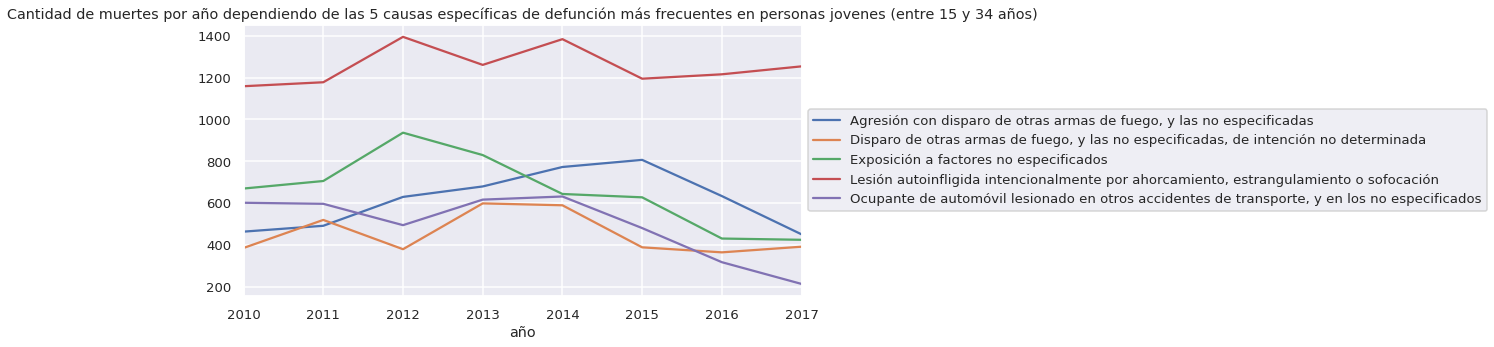

In [0]:
muertes_por_ano = defunciones.loc[(defunciones.grupos_edad_id < 8) & (defunciones.grupos_edad_id > 3)].groupby(["cie10_causa_nombre"])["cantidad_de_defunciones"].sum().sort_values(ascending=False).iloc[0:10]
muertes_por_ano.to_frame()
df_muertes_por_ano = pd.DataFrame(muertes_por_ano)
df_muertes_por_ano['causa'] = df_muertes_por_ano.index
def2 = pd.DataFrame(defunciones.loc[(defunciones.grupos_edad_id < 8) & (defunciones.grupos_edad_id > 3)]) 
def2 = def2.loc[(def2.cie10_causa_nombre == df_muertes_por_ano['causa'][0]) |(def2.cie10_causa_nombre == df_muertes_por_ano['causa'][1]) | (def2.cie10_causa_nombre == df_muertes_por_ano['causa'][2]) | (def2.cie10_causa_nombre == df_muertes_por_ano['causa'][3]) | (def2.cie10_causa_nombre == df_muertes_por_ano['causa'][4])]
flujo_tabla = pd.pivot_table(data = def2, values = 'cantidad_de_defunciones', index = 'año', columns = 'cie10_causa_nombre', aggfunc= np.sum, )
sns.set_context("talk", font_scale=0.8)
flujo_tabla.plot(title = "Cantidad de muertes por año dependiendo de las 5 causas específicas de defunción más frecuentes en personas jovenes (entre 15 y 34 años)", figsize=(10,5))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

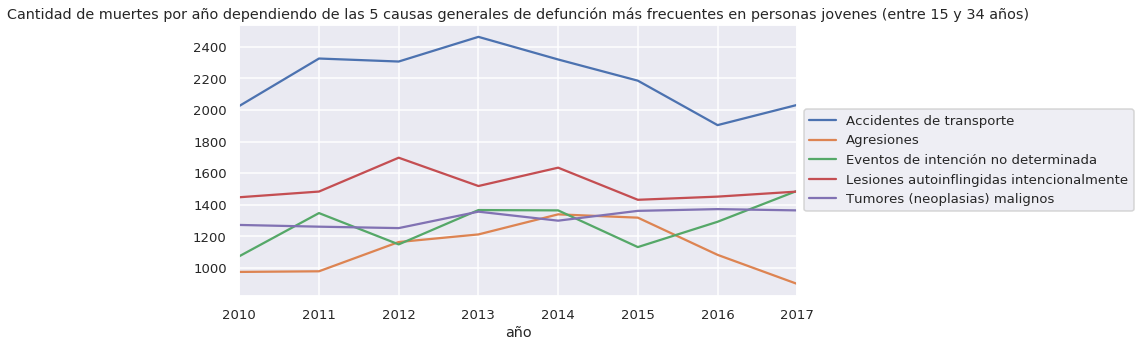

In [0]:
muertes_por_ano = defunciones.loc[(defunciones.grupos_edad_id < 8) & (defunciones.grupos_edad_id > 3)].groupby(["causa_muerte"])["cantidad_de_defunciones"].sum().sort_values(ascending=False).iloc[0:10]
muertes_por_ano.to_frame()
df_muertes_por_ano = pd.DataFrame(muertes_por_ano)
df_muertes_por_ano['causa'] = df_muertes_por_ano.index
def2 = pd.DataFrame(defunciones.loc[(defunciones.grupos_edad_id < 8) & (defunciones.grupos_edad_id > 3)]) 
def2 = def2.loc[(def2.causa_muerte == df_muertes_por_ano['causa'][0]) |(def2.causa_muerte == df_muertes_por_ano['causa'][1]) | (def2.causa_muerte == df_muertes_por_ano['causa'][2]) | (def2.causa_muerte == df_muertes_por_ano['causa'][3]) | (def2.causa_muerte == df_muertes_por_ano['causa'][4])]
flujo_tabla = pd.pivot_table(data = def2, values = 'cantidad_de_defunciones', index = 'año', columns = 'causa_muerte', aggfunc= np.sum, )
sns.set_context("talk", font_scale=0.8)
flujo_tabla.plot(title = "Cantidad de muertes por año dependiendo de las 5 causas generales de defunción más frecuentes en personas jovenes (entre 15 y 34 años)", figsize=(10,5))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

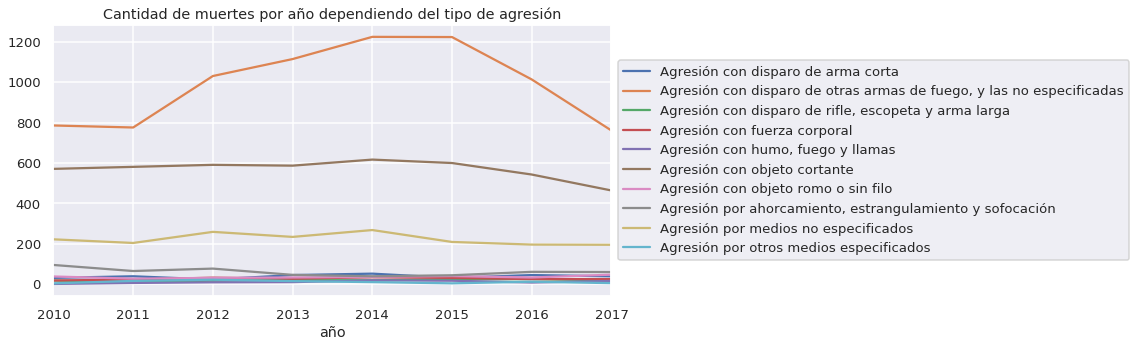

In [0]:
muertes_por_ano = defunciones.loc[(defunciones.causa_muerte == 'Agresiones')].groupby(["cie10_causa_nombre"])["cantidad_de_defunciones"].sum().sort_values(ascending=False).iloc[0:10]
muertes_por_ano.to_frame()
df_muertes_por_ano = pd.DataFrame(muertes_por_ano)
df_muertes_por_ano['causa'] = df_muertes_por_ano.index
def2 = pd.DataFrame(defunciones) 
def2 = def2.loc[(def2.cie10_causa_nombre == df_muertes_por_ano['causa'][0]) | (def2.cie10_causa_nombre == df_muertes_por_ano['causa'][1]) | (def2.cie10_causa_nombre == df_muertes_por_ano['causa'][2]) | (def2.cie10_causa_nombre == df_muertes_por_ano['causa'][3]) | (def2.cie10_causa_nombre == df_muertes_por_ano['causa'][4]) | (def2.cie10_causa_nombre == df_muertes_por_ano['causa'][5]) | (def2.cie10_causa_nombre == df_muertes_por_ano['causa'][6]) | (def2.cie10_causa_nombre == df_muertes_por_ano['causa'][7]) | (def2.cie10_causa_nombre == df_muertes_por_ano['causa'][8]) | (def2.cie10_causa_nombre == df_muertes_por_ano['causa'][9])]
flujo_tabla = pd.pivot_table(data = def2, values = 'cantidad_de_defunciones', index = 'año', columns = 'cie10_causa_nombre', aggfunc= np.sum, )
flujo_tabla.head(7)
sns.set_context("talk", font_scale=0.8)
flujo_tabla.plot(title = "Cantidad de muertes por año dependiendo del tipo de agresión", figsize=(10,5))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

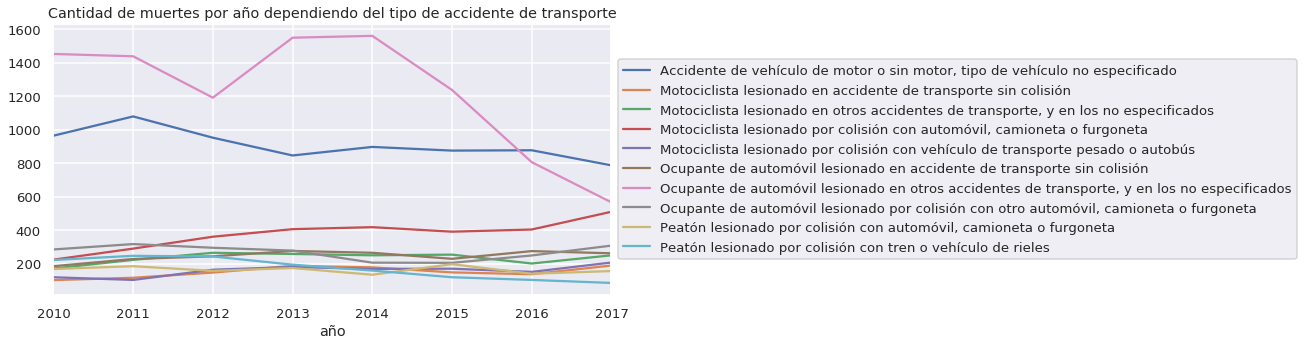

In [0]:
muertes_por_ano = defunciones.loc[(defunciones.letra_causa == 'V')].groupby(["cie10_causa_nombre"])["cantidad_de_defunciones"].sum().sort_values(ascending=False).iloc[0:10]
#muertes_por_ano = defunciones.groupby(["cie10_causa_nombre"])["cantidad_de_defunciones"].sum().sort_values(ascending=False).iloc[0:10]
#muertes_por_ano = defunciones.groupby(["cie10_causa_nombre","año"])["cantidad_de_defunciones"].sum().sort_values(ascending=False).iloc[0:129]
muertes_por_ano.to_frame()
df_muertes_por_ano = pd.DataFrame(muertes_por_ano)
df_muertes_por_ano['causa'] = df_muertes_por_ano.index
def2 = pd.DataFrame(defunciones) 
def2 = def2.loc[(def2.cie10_causa_nombre == df_muertes_por_ano['causa'][0]) | (def2.cie10_causa_nombre == df_muertes_por_ano['causa'][1]) | (def2.cie10_causa_nombre == df_muertes_por_ano['causa'][2]) | (def2.cie10_causa_nombre == df_muertes_por_ano['causa'][3]) | (def2.cie10_causa_nombre == df_muertes_por_ano['causa'][4]) | (def2.cie10_causa_nombre == df_muertes_por_ano['causa'][5]) | (def2.cie10_causa_nombre == df_muertes_por_ano['causa'][6]) | (def2.cie10_causa_nombre == df_muertes_por_ano['causa'][7]) | (def2.cie10_causa_nombre == df_muertes_por_ano['causa'][8]) | (def2.cie10_causa_nombre == df_muertes_por_ano['causa'][9])]
flujo_tabla = pd.pivot_table(data = def2, values = 'cantidad_de_defunciones', index = 'año', columns = 'cie10_causa_nombre', aggfunc= np.sum, )
flujo_tabla.head(7)
sns.set_context("talk", font_scale=0.8)
flujo_tabla.plot(title = "Cantidad de muertes por año dependiendo del tipo de accidente de transporte", figsize=(10,5))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

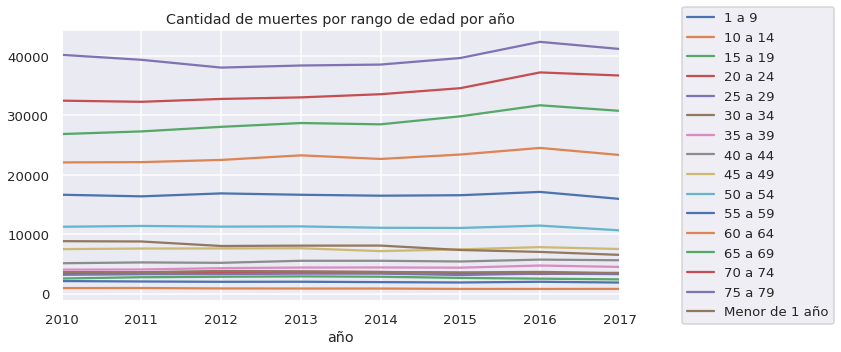

In [0]:
def_por_edad = pd.pivot_table(defunciones,values = 'cantidad_de_defunciones',columns = 'grupos_edad_nombre', index = 'año', aggfunc = np.sum)
def_por_edad = def_por_edad.drop(columns=['80 y más']) # eliminamos la más cuantiosa para una mejor visualizacion
sns.set_context("talk", font_scale=0.8)
def_por_edad.plot(title = "Cantidad de muertes por rango de edad por año", figsize=(10,5))
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.show()